# Approximate KNN classifiers

One may have noticed in the previous exercise, prediction is very slow with a KNN classifier. Thus, there exists approximation methods. One in particular is [FLANN](http://people.cs.ubc.ca/~mariusm/index.php/FLANN/FLANN). To install, we use Homebrew.

```
$ brew install flann --with-python
$ /usr/local/Cellar/flann/1.8.4_1/share/python
$ sudo python setup.py install
```

Let's give it a whirl.

In [1]:
%matplotlib inline

import numpy as np
import idx2numpy
import pyflann
import mnist
import matplotlib.pyplot as plt

train_image_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
test_image_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')

flattened_train_images = train_images.reshape((train_images.shape[0],
                                               train_images.shape[1]*train_images.shape[2]), 
                                              order='C')
flattened_test_images = test_images.reshape((test_images.shape[0], 
                                             test_images.shape[1]*test_images.shape[2]), 
                                            order='C')

The first step is to build the index.

In [2]:
pyflann.set_distance_type('minkowski', order=2)
flann = pyflann.FLANN()
index_params = flann.build_index(flattened_train_images, log_level='info', 
                                 algorithm='kdtree', trees=10)
index_params

{'algorithm': 'kdtree',
 'branching': 32,
 'build_weight': 0.009999999776482582,
 'cb_index': 0.5,
 'centers_init': 'default',
 'checks': 32,
 'cores': 0,
 'eps': 0.0,
 'iterations': 5,
 'key_size_': 20,
 'leaf_max_size': 4,
 'log_level': 'info',
 'max_neighbors': -1,
 'memory_weight': 0.0,
 'multi_probe_level_': 2,
 'random_seed': 478661584,
 'sample_fraction': 0.10000000149011612,
 'sorted': 1,
 'speedup': 0.0,
 'table_number_': 12,
 'target_precision': 0.8999999761581421,
 'trees': 10}

Let's take a look at our test data.

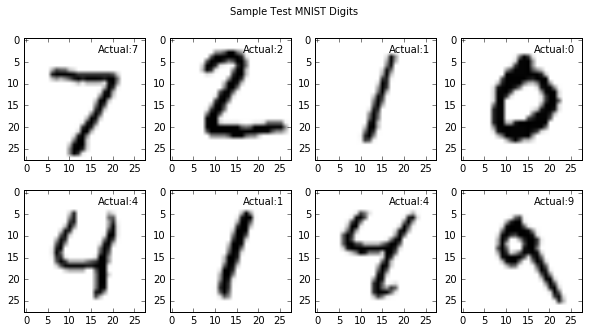

In [3]:
fig = plt.figure(figsize=(10,5))
for i in range (8):
    fig.add_subplot(2,4,i + 1)
    mnist.plot_image(test_images[i], test_image_labels[i])
fig.suptitle("Sample Test MNIST Digits")
plt.show()

Let us try and make predictions now.

In [4]:
neighbor, dist = flann.nn_index(flattened_test_images[:1000], num_neigbors=1, checks=index_params['checks'])
test_image_predictions = train_image_labels[neighbor]
sum(test_image_predictions != test_image_labels[:1000])/1000

0.047

We see that the error rate increases only slightly, and the the algorithm runs faster.